In [2]:
import pandas
import seaborn
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.feature_selection import VarianceThreshold
import sklearn.ensemble
import sklearn.compose
from sklearn.preprocessing import *

raw_data = pandas.read_csv('Automobile_data.csv')
display(raw_data)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
display(raw_data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
data_with_nones = raw_data.replace('?', None)
display(data_with_nones.isnull().sum())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
def find_mean(df, grouping, column):
    mean = {}
    for index, row in df.iterrows():
        if row[column] is None:
            continue
        if row[grouping] not in mean:
            mean[row[grouping]] = np.array([])
        mean[row[grouping]] = np.append(mean[row[grouping]], [float(row[column])])
    for group, values in mean.items():
        mean[group] = np.mean(mean[group])
    return mean

mean_symbols = find_mean(data_with_nones, "symboling", "normalized-losses")
mean_curb = find_mean(data_with_nones, "curb-weight", "price")
display(mean_symbols)
display(mean_curb)

{2: 125.6896551724138,
 1: 128.5744680851064,
 0: 113.16666666666667,
 -1: 85.6,
 3: 168.64705882352942,
 -2: 103.0}

{2548: 14997.5,
 2823: 16500.0,
 2337: 10367.5,
 2824: 17450.0,
 2507: 15250.0,
 2844: 17710.0,
 2954: 18920.0,
 3086: 23875.0,
 2395: 16677.5,
 2710: 20970.0,
 2765: 21105.0,
 3055: 24565.0,
 3230: 21600.0,
 3380: 41315.0,
 3505: 36880.0,
 1488: 5151.0,
 1874: 6295.0,
 1909: 6575.0,
 1876: 5974.5,
 2128: 7957.0,
 1967: 6229.0,
 1989: 6997.666666666667,
 2191: 8083.5,
 2535: 8921.0,
 2811: 12964.0,
 1713: 6479.0,
 1819: 6855.0,
 1837: 5399.0,
 1940: 6529.0,
 1956: 7129.0,
 2010: 7295.0,
 2024: 7322.0,
 2236: 7895.0,
 2289: 9095.0,
 2304: 8845.0,
 2372: 10295.0,
 2465: 12945.0,
 2293: 10345.0,
 2734: 11048.0,
 4066: 33900.0,
 3950: 36000.0,
 1890: 5195.0,
 1900: 6095.0,
 1905: 6795.0,
 1945: 6695.0,
 1950: 7395.0,
 2380: 11395.0,
 2385: 10579.5,
 2500: 15645.0,
 2410: 9370.0,
 2443: 10795.0,
 2425: 11245.0,
 2670: 18280.0,
 2700: 18344.0,
 3515: 25552.0,
 3750: 28248.0,
 3495: 28176.0,
 3770: 31600.0,
 3740: 34184.0,
 3685: 35056.0,
 3900: 40960.0,
 3715: 45400.0,
 2910: 16503.0,
 1918:

In [6]:
def replace_with_mean(row):
    if row["normalized-losses"] is None:
        symbol = row["symboling"]
        row["normalized-losses"] = mean_symbols[symbol]
    if row["price"] is None:
        row["price"] = mean_curb[row["curb-weight"]] if row["curb-weight"] in mean_curb else None
    return row

filtered_data = data_with_nones.apply(lambda row: replace_with_mean(row), axis = 1).dropna()
filtered_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168.647059,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,128.574468,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [7]:
transformed_data = filtered_data
transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))
transformed_data['make'] = LabelEncoder().fit_transform(transformed_data['make'].values)
transformed_data['fuel-type'] = LabelEncoder().fit_transform(transformed_data['fuel-type'].values)
transformed_data['aspiration'] = LabelEncoder().fit_transform(transformed_data['aspiration'].values)
transformed_data['num-of-doors'] = LabelEncoder().fit_transform(transformed_data['num-of-doors'].values)
transformed_data['body-style'] = LabelEncoder().fit_transform(transformed_data['body-style'].values)
transformed_data['drive-wheels'] = LabelEncoder().fit_transform(transformed_data['drive-wheels'].values)
transformed_data['engine-location'] = LabelEncoder().fit_transform(transformed_data['engine-location'].values)
transformed_data['engine-type'] = LabelEncoder().fit_transform(transformed_data['engine-type'].values)
transformed_data['fuel-system'] = LabelEncoder().fit_transform(transformed_data['fuel-system'].values)
transformed_data['num-of-cylinders'] = LabelEncoder().fit_transform(transformed_data['num-of-cylinders'].values)
transformed_data['price'] = transformed_data['price'].apply(lambda x: float(x))
transformed_data['normalized-losses'] = transformed_data['normalized-losses'].apply(lambda x: float(x))
display(transformed_data)
transformed_data["engine-location"].unique()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,168.647059,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1.0,168.647059,0,1,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.6,128.574468,0,1,0,1,2,2,0,94.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.8,164.000000,1,1,0,0,3,1,0,99.8,...,109,4,3.19,3.4,10.0,102,5500,24,30,13950.0
4,0.8,164.000000,1,1,0,0,3,0,0,99.4,...,136,4,3.19,3.4,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.000000,20,1,0,0,3,2,0,109.1,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.000000,20,1,1,0,3,2,0,109.1,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.000000,20,1,0,0,3,2,0,109.1,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95.000000,20,0,1,0,3,2,0,109.1,...,145,2,3.01,3.4,23.0,106,4800,26,27,22470.0


array([0, 1])

In [11]:
columns_array = transformed_data.columns

selection = VarianceThreshold(threshold=(.8 * (1 - 0.8)))
selected_data = selection.fit_transform(transformed_data.drop(["price"], axis=1), transformed_data["price"])
selected_features = selection.get_feature_names_out(columns_array[:len(columns_array) - 1])
selected_data = pandas.DataFrame(selected_data, columns=selected_features)
deleted_features = np.array([], dtype=str)
for feature in columns_array[:len(columns_array) - 1]:
    if feature not in selected_features:
        deleted_features = np.append(deleted_features, feature)

display(pandas.DataFrame(selected_features))
display(pandas.DataFrame(deleted_features))
display(selected_data)

,0
0,normalized-losses
1,make
2,num-of-doors
3,body-style
4,drive-wheels
5,wheel-base
6,length
7,width
8,height
9,curb-weight


,0
0,symboling
1,fuel-type
2,aspiration
3,engine-location
4,bore
5,stroke


,normalized-losses,make,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,168.647059,0,1,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,4,9.0,111,5000,21,27
1,168.647059,0,1,0,2,88.6,168.8,64.1,48.8,2548,0,2,130,4,9.0,111,5000,21,27
2,128.574468,0,1,2,2,94.5,171.2,65.5,52.4,2823,4,3,152,4,9.0,154,5000,19,26
3,164.0,1,0,3,1,99.8,176.6,66.2,54.3,2337,2,2,109,4,10.0,102,5500,24,30
4,164.0,1,0,3,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,95.0,20,0,3,2,109.1,188.8,68.9,55.5,2952,2,2,141,4,9.5,114,5400,23,28
191,95.0,20,0,3,2,109.1,188.8,68.8,55.5,3049,2,2,141,4,8.7,160,5300,19,25
192,95.0,20,0,3,2,109.1,188.8,68.9,55.5,3012,4,3,173,4,8.8,134,5500,18,23
193,95.0,20,0,3,2,109.1,188.8,68.9,55.5,3217,2,3,145,2,23.0,106,4800,26,27


In [13]:
kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=5)
transformed_data_kbest = kbest.fit_transform(transformed_data.drop(["price"], axis=1),
                                             transformed_data["price"])
selected_features = kbest.get_feature_names_out(columns_array[:len(columns_array) - 1])
transformed_data_kbest = pandas.DataFrame(transformed_data_kbest, columns=selected_features)
transformed_data_kbest

,normalized-losses,curb-weight,engine-size,horsepower,peak-rpm
0,168.647059,2548,130,111,5000
1,168.647059,2548,130,111,5000
2,128.574468,2823,152,154,5000
3,164.0,2337,109,102,5500
4,164.0,2824,136,115,5500
...,...,...,...,...,...
190,95.0,2952,141,114,5400
191,95.0,3049,141,160,5300
192,95.0,3012,173,134,5500
193,95.0,3217,145,106,4800


In [14]:
tree_classifier = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
tree_classifier.fit(transformed_data.drop(["price"], axis=1),
                    transformed_data["price"])
model = sklearn.feature_selection.SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(transformed_data.drop(["price"], axis=1))
forest_selected_data

C:\Users\nisko\miniconda3\envs\dsml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[2548, 130],
       [2548, 130],
       [2823, 152],
       [2337, 109],
       [2824, 136],
       [2507, 136],
       [2844, 136],
       [2954, 136],
       [3086, 131],
       [2395, 108],
       [2395, 108],
       [2710, 164],
       [2765, 164],
       [3055, 164],
       [3230, 209],
       [3380, 209],
       [3505, 209],
       [1488, 61],
       [1874, 90],
       [1909, 90],
       [1876, 90],
       [1876, 90],
       [2128, 98],
       [1967, 90],
       [1989, 90],
       [1989, 90],
       [2535, 122],
       [2811, 156],
       [1713, 92],
       [1819, 92],
       [1837, 79],
       [1940, 92],
       [1956, 92],
       [2010, 92],
       [2024, 92],
       [2236, 110],
       [2289, 110],
       [2304, 110],
       [2372, 110],
       [2465, 110],
       [2293, 110],
       [2337, 111],
       [1874, 90],
       [1909, 90],
       [2734, 119],
       [4066, 258],
       [4066, 258],
       [3950, 326],
       [1890, 91],
       [1900, 91],
       [1905, 91],
 

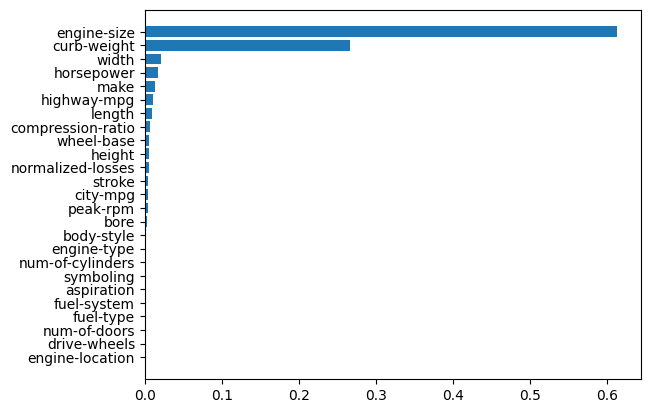

In [15]:
feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(transformed_data.drop(["price"], axis=1).columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.show()

C:\Users\nisko\AppData\Local\Temp\ipykernel_13780\1593634393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = transformed_data.corr()


<AxesSubplot: >

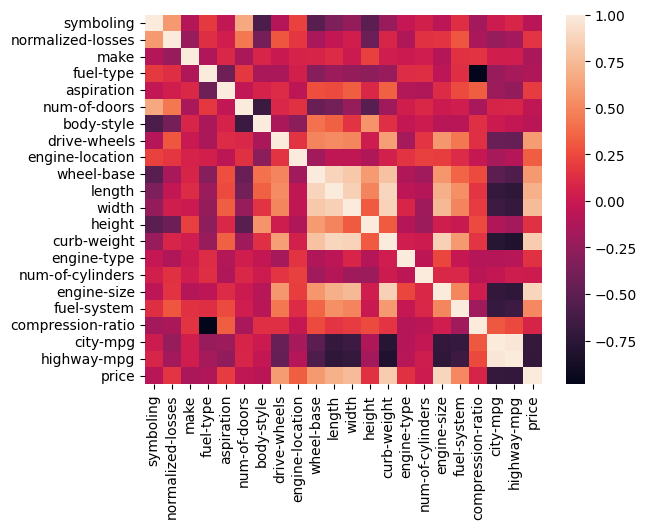

In [17]:
correlation = transformed_data.corr()
seaborn.heatmap(correlation)